In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from numba import njit
from src.game import discrete_geometry as dg

## Matplotlib stuff

In [35]:
def mk_rectangles(ax, xy_list, alpha=0.1):
    for xy in xy_list:
        rect = patches.Rectangle(xy, 1, 1, facecolor='k', alpha=alpha)
        ax.add_patch(rect)

def mk_grid(xy_list, alpha=0.1):
    fig, ax = plt.subplots()
    mk_rectangles(ax, xy_list, alpha)
    plt.xlim([0, 80])
    plt.ylim([0, 60])
    ax.set_xticks(np.linspace(0,80,81))
    ax.set_yticks(np.linspace(0,60,61))
    plt.grid()
    plt.show()

## Utils

In [36]:
def mk_all_edge_xy(dims):
    xy_list = []
    for x in range(dims[0]):
        for y in range(dims[1]):
            if x == 0 or x == dims[0]-1 or y == 0 or y == dims[1]-1:
                xy = [x, y]
                xy_list.append(xy)
    return np.array(xy_list)


In [37]:
def times_per_sec(func, *args, **kwargs):
    iters = 1000
    t0 = time.time()
    for _ in range(iters):
        func(*args, **kwargs)
    t1 = time.time()
    print(iters/(t1-t0))

## Geometry

## Experiments

In [38]:
dims = (80, 60)
xy = [40, 30]
density = 360
dm = dims
radial = dg.bresenham_radial(dm) + xy

# Chunks of Grid

In [79]:
circ = dg.bresenham_circle_tweaked(2)
l_source = np.random.randint(-20, 20, size=(2), dtype='i2')

d_xy = (l_source - circ).T
dists = np.sqrt(d_xy[0]**2 + d_xy[1]**2)
min_idx = np.argmin(dists)
closest = circ[min_idx]
print(closest)


[2 1]


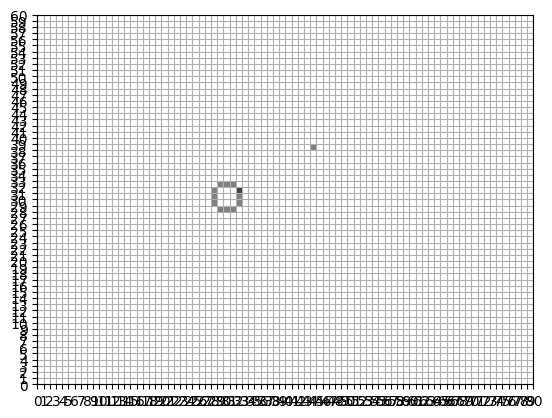

In [80]:
XY_LIST = np.concatenate((circ, l_source[None], closest[None]))
xy_shift = np.array([30, 30])
XY_LIST += xy_shift
mk_grid(XY_LIST, 0.5)